# Projet : réaliser une étude sur les produits alimentaires

## 1 - Contexte

Vous réalisez une mission "UFC-Que Choisir". Cette association vous demande de réaliser une étude 
sur la qualité des produits alimentaires mis à disposition des consommateurs par les marques. Cette étude a vocation à aider les consommateurs dans leurs choix.

L'objectif est d'analyser les marques sur au moins les critères suivants : la qualité nutritionnelle, l'impact environnemental, la part des produits biologiques.


Pour cela, vous proposer d'utiliser les données de l'application Yuka

Voici une liste des questions que se pose l'association : 

- Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

- Quelles sont les marques qui ont le plus recours aux additifs nocifs

- Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

- Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

- Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

- Quelles sont les marques qui proposent essentiellement des produits biologiques ?

- Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ? 

- Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

- Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

- Quelles marques faut-il recommander ? 

- Quelles marques ne faut-il surtout pas recommander ? 




## 2 - Données

3 fichiers issues de l'application Yuka sont à exploiter pour réaliser l'analyse. 


Agriculture_biologique_final.csv

Qualite nutritionnelle_final.csv

Impact environnemental_final.csv

Voici le lien pour récupérer les fichiers

# https://www.dropbox.com/sh/pwsv4coi2sbbhyo/AABJ81-xWu3K2Cl0DOCmwbGsa?dl=0

## 3 - Consignes

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

## 4 - Contraintes

Votre analyse doit inclure des analyses univariées et multivariées


## 5 - Préparation de l'environnement

In [96]:
# Import des librairies
import pandas as pd
import numpy as np
import scipy
from scipy.stats import chi2_contingency as chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

pd.set_option("display.max_columns", None)
sns.set()

list_color = ["r", "g", "b", "c", "m", "y"]


In [33]:
bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)


In [34]:
#Les fonctions pour initialiser les DF

def bio_init():
    bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
    return bio
def env_init():
    env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
    return env
def quali_init():
    quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)
    return quali

In [35]:
quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## 6 - A vous de jouer¶

Inspirez-vous du TP vu en cours

# Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

In [36]:
nutri = quali.copy()
nutri = nutri[["brands_tags","nutriscore_grade"]]
nutri = nutri.groupby(by="brands_tags").nutriscore_grade.agg(["count"]).sort_values(by="count", ascending=False)
nutri

,count
brands_tags,
auchan,7030
carrefour,6499
u,4521
casino,3289
leader-price,3123
...,...
"knorr,unilever,knorr-schmeck-die-welt",0
"knorr,moments-gourmets,unilever",0
"knorr,knorr-professional",0


In [37]:
print("Le nombre de marque totale est :", nutri.index.nunique())
print("Ceci est une liste des marques qui affichent le nutriscore: \n", nutri[nutri["count"]>0])

Le nombre de marque totale est : 58298
Ceci est une liste des marques qui affichent le nutriscore: 
                                            count
brands_tags                                     
auchan                                      7030
carrefour                                   6499
u                                           4521
casino                                      3289
leader-price                                3123
...                                          ...
ape                                            1
signature-select,better-living-brands-llc      1
selection-des-mousquetaires                    1
silvia                                         1
ever-green                                     1

[33460 rows x 1 columns]


In [38]:
print("Le nombre de marque totale est :", nutri.index.nunique())
print("Ceci est une liste des marques qui n'affichent pas le nutriscore: \n", nutri[nutri["count"]==0])

Le nombre de marque totale est : 58298
Ceci est une liste des marques qui n'affichent pas le nutriscore: 
                                        count
brands_tags                                 
wahaha                                     0
olympuds                                   0
vin-bourgueil                              0
old-hop                                    0
vegetal-bion                               0
...                                      ...
knorr,unilever,knorr-schmeck-die-welt      0
knorr,moments-gourmets,unilever            0
knorr,knorr-professional                   0
knorr,knorq                                0
청정원,daesang                                0

[24838 rows x 1 columns]


avec Nutriscore 33460
...ou pas! 24838


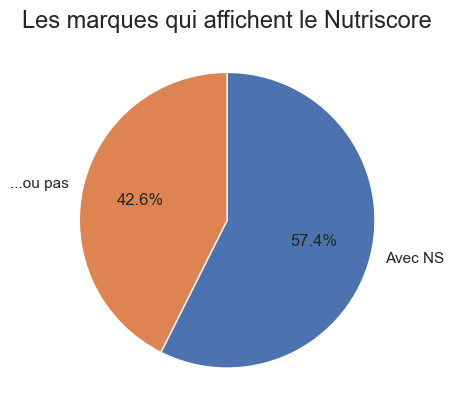

In [39]:
nutri_x = len(nutri[nutri["count"]>0])
nutri_y = len(nutri[nutri["count"]==0])

x = [nutri_x, nutri_y]
label =["Avec NS", "...ou pas"]

plt.title("Les marques qui affichent le Nutriscore", fontsize=17)

plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")

print("avec Nutriscore", len(nutri[nutri["count"]>0]))
print("...ou pas!", len(nutri[nutri["count"]==0]))
    

# Quelles sont les marques qui ont le plus recours aux additifs nocifs

In [40]:
quali.nb_nocif.unique()
quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [41]:
print("Il y a ", quali["nb_nocif"].isin([0.0]).sum(), " produit(s) sans additif nocif")
print("Il y a ", quali["nb_nocif"].isin([1.0]).sum(), " produit(s) avec 1 additif nocif")
print("Il y a ", quali["nb_nocif"].isin([2.0]).sum(), " produit(s) avec 2 additifs nocifs")

Il y a  932413  produit(s) sans additif nocif
Il y a  452  produit(s) avec 1 additif nocif
Il y a  1  produit(s) avec 2 additifs nocifs


In [42]:
quali = quali[quali["brands_tags"].notna()]
quali = quali[quali["product_name"].notna()]

In [212]:
#création nouveau DF
nocif_b = quali.copy()

#remplacer soit par inconnu soit par le nom du produit
nocif_b["brands_tags"] = nocif_b["brands_tags"].fillna(nocif_b["product_name"])

#calculer le nb de produits nocifs par marques pour les 10 plus nocifs
nocif = nocif_b.groupby(by="brands_tags").nb_nocif.agg([sum,"count"]).sort_values(by="sum", ascending=False)
#calculer par pourcentage le nb de produits nocifs par marque
nocif["ratio"] = (nocif["sum"]/nocif["count"]*100).round(2)[:10]
nocif
#les classer par leur pourcentages(option)
# nocif.sort_values(by="ratio", ascending=False)
#attention!!! si on fait count(), il affiche que la totale produits

,sum,count,ratio
brands_tags,,,
sodastream,29.0,145,20.00
"nestle,sveltesse",10.0,19,52.63
a-rom,9.0,59,15.25
dove,8.0,47,17.02
nestle,7.0,2863,0.24
...,...,...,...
Haricots blancs extra,0.0,1,NaN
Haricots blancs en sauce tomate,0.0,1,NaN
Haricots blancs cuits avec des légumes,0.0,1,NaN


<Axes: title={'center': '10 marques qui ont le plus recours aux additifs nocifs'}, xlabel='marques', ylabel='Nombre de nocif'>

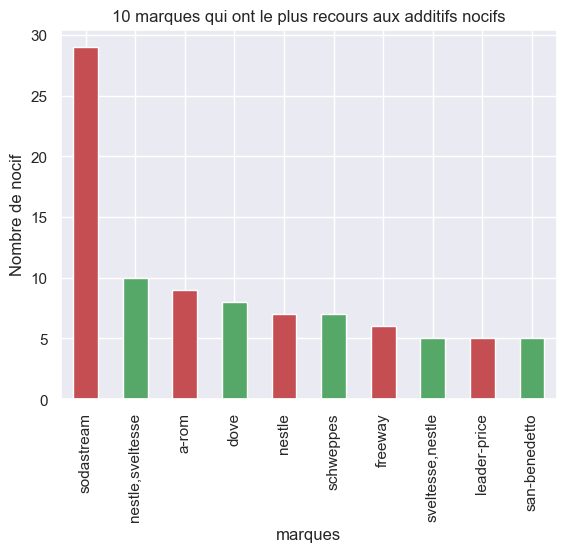

In [44]:
list_color = ["r", "g"]
nocif["sum"].plot.bar(title="10 marques qui ont le plus recours aux additifs nocifs", color=list_color, ylabel="Nombre de nocif", xlabel="marques")

# Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

In [179]:
# Initialisation au cas d'une affection inattendue
quali = quali_init()

In [159]:
#Créer un nouveau DF combiné
quali_temp = quali.copy()
quali_temp
# remplacer soit par inconnu soit par le nom du produit
quali_temp["brands_tags"] = quali_temp["brands_tags"].fillna(quali_temp["product_name"])


quali_temp.dropna(subset="nutriscore_grade", inplace=True)
quali_a = quali_temp[["brands_tags"]]

#get_dummies permets de transformer des données qualifiant sous forme bool
quali_b = pd.get_dummies(quali_temp.nutriscore_grade)

quali_marge = quali_a.join(quali_b)
quali_marge.dropna(inplace=True)

In [160]:
quali_marge


,brands_tags,a,b,c,d,e
0,danone,1,0,0,0,0
3,courte-paille,0,0,0,1,0
9,Salade de carottes râpées,0,1,0,0,0
16,"crous-resto,crous",0,0,0,1,0
22,crous,1,0,0,0,0
...,...,...,...,...,...,...
932758,Brownie Sports avec pépites de chocolat,0,0,0,1,0
932787,Bio mozzarella,0,0,1,0,0
932832,Nespresso,0,1,0,0,0
932858,Riz au lait,0,0,1,0,0


In [46]:
quali_marge

,brands_tags,a,b,c,d,e
0,danone,1,0,0,0,0
3,courte-paille,0,0,0,1,0
16,"crous-resto,crous",0,0,0,1,0
22,crous,1,0,0,0,0
50,crousresto,1,0,0,0,0
...,...,...,...,...,...,...
932649,reghalal,0,0,1,0,0
932720,monoprix,1,0,0,0,0
932721,agidra,0,0,0,0,1
932752,les-comtes-de-provence,0,0,1,0,0


In [161]:
#transformer les bool aux chiffres
scores = {"a":5, "b":4, "c":3, "d":2, "e":1}
quali_marge["score_total"] = quali_marge[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores)), axis=1)

quali_trie = quali_marge.sort_values('score_total', ascending=False)
quali_trie


,brands_tags,a,b,c,d,e,score_total
0,danone,1,0,0,0,0,5
139255,garofalo,1,0,0,0,0,5
139216,"lustucru,panzani",1,0,0,0,0,5
418095,uncle-ben-s,1,0,0,0,0,5
418093,uncle-ben-s,1,0,0,0,0,5
...,...,...,...,...,...,...,...
444746,"betty-bossi,coop",0,0,0,0,1,1
128430,les-comtes-de-provence,0,0,0,0,1,1
444713,naturaplan,0,0,0,0,1,1
444710,"naturaplan,coop",0,0,0,0,1,1


In [163]:
top_NS = quali_trie.groupby(by="brands_tags").sum().sort_values(by="score_total", ascending=False)
top_NS["Nb_produits"] = top_NS["a"]+top_NS["b"]+top_NS["c"]+top_NS["d"]+top_NS["e"]


ind = top_NS[top_NS["Nb_produits"] <500].index
top_NS.drop(ind, inplace = True)
top_NS

,a,b,c,d,e,score_total,Nb_produits
brands_tags,,,,,,,
auchan,1670,1084,1485,1826,965,21758,7030
carrefour,1295,945,1317,1885,1057,19033,6499
u,977,728,935,1226,655,13709,4521
casino,695,532,744,869,449,10022,3289
leader-price,529,501,721,850,522,9034,3123
picard,635,409,491,516,126,7442,2177
cora,450,309,552,668,434,6912,2413
le-gaulois,422,425,719,149,8,6273,1723
monoprix,400,308,343,505,196,5467,1752


In [49]:
total_top = top_NS[["score_total"]].head(5)

#afficher top5 a -> e en points calculés
top_NS_points = top_NS.copy()
top_NS_points[["a","b","c","d","e"]] = top_NS_points[["a","b","c","d","e"]].apply(lambda row:(row*pd.Series(scores)), axis =1)
top_NS_points

,a,b,c,d,e,score_total,Nb_produits
brands_tags,,,,,,,
auchan,8345.0,4324.0,4452.0,3652.0,964.0,21737,7024
carrefour,6470.0,3776.0,3942.0,3768.0,1051.0,19007,6487
u,4885.0,2912.0,2805.0,2452.0,655.0,13709,4521
casino,3475.0,2124.0,2232.0,1738.0,449.0,10018,3288
leader-price,2645.0,1992.0,2160.0,1698.0,522.0,9017,3118
picard,3175.0,1632.0,1473.0,1028.0,126.0,7434,2174
cora,2250.0,1236.0,1656.0,1336.0,434.0,6912,2413
le-gaulois,2110.0,1700.0,2157.0,298.0,8.0,6273,1723
monoprix,1995.0,1224.0,1026.0,1010.0,195.0,5450,1747


In [164]:
# DF avec du ratio A,B,C par total
top_NS_ratio = top_NS.copy()

top_NS_ratio["ratio_AB(%)"] = ((top_NS_ratio["a"]+top_NS_ratio["b"])/top_NS_ratio["Nb_produits"]*100).round(2)
top_NS_ratio = top_NS_ratio.sort_values(by="ratio_AB(%)", ascending=False).head(5)
top_NS_ratio

,a,b,c,d,e,score_total,Nb_produits,ratio_AB(%)
brands_tags,,,,,,,,
bonduelle,487,104,35,2,0,2960,628,94.11
la-nouvelle-agriculture,560,261,27,32,5,3994,885,92.77
charal,300,103,75,64,1,2266,543,74.22
danone,169,186,156,9,14,2089,534,66.48
bjorg,182,152,72,96,36,1962,538,62.08


In [167]:
# Pareil pour les pires

worst_NS_ratio = top_NS.copy()

worst_NS_ratio["ratio_DE(%)"] = ((worst_NS_ratio["d"]+worst_NS_ratio["e"])/worst_NS_ratio["Nb_produits"]*100).round(2)
worst_NS_ratio = worst_NS_ratio.sort_values(by="ratio_DE(%)", ascending=False)
worst_NS_5 = worst_NS_ratio.head(5)
worst_NS_5


,a,b,c,d,e,score_total,Nb_produits,ratio_DE(%)
brands_tags,,,,,,,,
lindt,0,0,0,12,491,515,503,100.00
haribo,2,6,9,491,25,1068,533,96.81
labeyrie,0,12,36,360,189,1065,597,91.96
leclerc,29,53,125,254,193,1433,654,68.35
bonne-maman,14,14,162,189,150,1140,529,64.08


<Axes: title={'center': 'Proportion des 5 meil marques avec des Nutriscores A,B'}, xlabel='Marques', ylabel='Ratio AB(%)'>

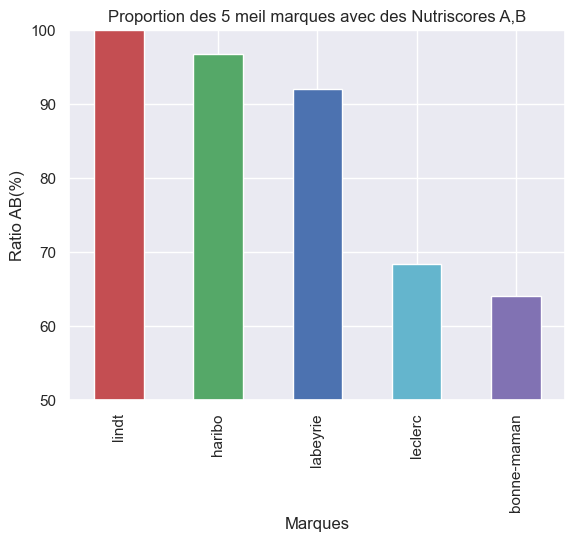

In [168]:
worst_NS_5.iloc[:,-1].plot.bar(ylim=(50,100), ylabel="Ratio AB(%)", xlabel="Marques",\
                                 color=list_color,\
                                 title="Proportion des 5 meil marques avec des Nutriscores A,B")

<Axes: title={'center': 'Proportion des 5 pires marques avec des Nutriscores DE'}, xlabel='Marques', ylabel='Ratio DE(%)'>

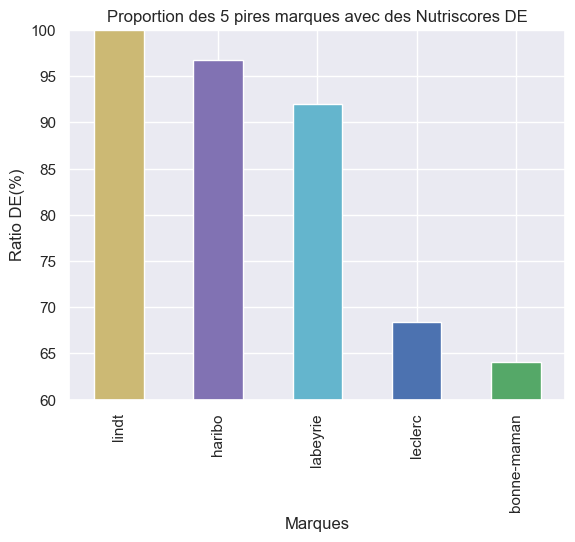

In [171]:
worst_NS_5.iloc[:,-1].plot.bar(ylim=(60,100), ylabel="Ratio DE(%)", xlabel="Marques",\
                                 color=list_color[::-1],\
                                 title="Proportion des 5 pires marques avec des Nutriscores DE")

# Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

In [180]:
env = env_init()

In [54]:
env.head(2)

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False


In [55]:
eco = env.copy()
eco.ecoscore_grade.fillna(0, inplace=True)
eco_table = eco.pivot_table(index="brands_tags", columns ="ecoscore_grade", values = "product_name", aggfunc ={"product_name" : "count"}, margins=True)
eco_table["totale_abcde"] = eco_table.iloc[:,1:6].sum(axis=1)
eco_table

ecoscore_grade,0,a,b,c,d,e,not-applicable,unknown,All,totale_abcde
brands_tags,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0
"0,neuhauser",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0
"0,ranou",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0
0-sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0
1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
"데미-소다,demisoda",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0
"샘표,saempyo,sempio",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0
"자연은,jayeon-eun",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0


In [56]:
print("Le nombre de marque totale est :", eco_table.index.nunique(), "\n")
print("Ceci est une liste des marques qui affichent le nutriscore: \n", eco_table[eco_table["totale_abcde"]>0].index)

Le nombre de marque totale est : 58299 

Ceci est une liste des marques qui affichent le nutriscore: 
 Index(['1', '1-2-3-bio', '1-2-3-fruits', '1-2-3-fruits,tetra-pak', '10-5',
       '100-crous', '100-pour-100-equitable', '1001-delights',
       '1001-delights,lidl', '1001-graines',
       ...
       '‭-‭apfelsaft', 'イチビキ', '微记', '水煮蔬菜', '谷优,gullon-biscuits,gullon',
       '馬玉山,greenmax', '麺喰い亭', '샘표,saempyo,sempio', '자연은,jayeon-eun', 'All'],
      dtype='object', name='brands_tags', length=33052)


In [57]:
print("Le nombre de marque totale est :", eco_table.index.nunique(),  "\n")
print("Ceci est une liste des marques qui n'affichent pas le nutriscore: \n", eco_table[eco_table["totale_abcde"]==0].index)

Le nombre de marque totale est : 58299 

Ceci est une liste des marques qui n'affichent pas le nutriscore: 
 Index(['0', '0,neuhauser', '0,ranou', '0-sauce', '10-genia', '100', '100-bon',
       '100-coco', '100-fruit', '100-juice',
       ...
       '伍中,wu-chung', '农夫山泉-nongfushanquan', '富隆坊', '悠口悠心', '白家', '谷优,gullon',
       '长寿面', '국순당,kooksoondang', '데미-소다,demisoda', '청정원,daesang'],
      dtype='object', name='brands_tags', length=25247)


avec Ecoscore 33052
...ou pas! 25247


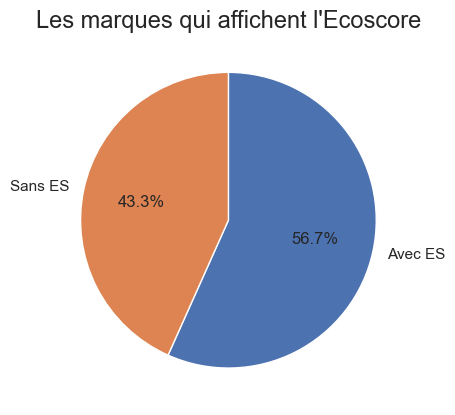

In [58]:
eco_x = len(eco_table[eco_table["totale_abcde"]>0])
eco_y = len(eco_table[eco_table["totale_abcde"]==0])

x = [eco_x, eco_y]
label =["Avec ES", "Sans ES"]

plt.title("Les marques qui affichent l'Ecoscore", fontsize=17)

plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
print("avec Ecoscore", len(eco_table[eco_table["totale_abcde"]>0]))
print("...ou pas!", len(eco_table[eco_table["totale_abcde"]==0]))

In [181]:
# ceci est une idée de Jules
eco2 = env.copy()
eco2['ecoscore_grade'].replace('unknown', np.NaN, inplace = True)
eco2['ecoscore_grade'].replace('not-applicable', np.NaN, inplace = True)
eco2.ecoscore_grade.unique()

array(['d', nan, 'c', 'e', 'b', 'a'], dtype=object)

In [182]:
eco2 = eco2[["brands_tags","ecoscore_grade"]]
eco2 = eco2.groupby(by="brands_tags").ecoscore_grade.agg(["count"]).sort_values(by="count", ascending=False)
eco2

,count
brands_tags,
carrefour,6567
auchan,6496
u,4215
casino,2917
leader-price,2827
...,...
"kinder,kinder-surprise,ferrero",0
"kinder,kinder-ferrero",0
"kinder,kinder-country",0


In [183]:
print("Le nombre de marque totale est :", eco2.index.nunique())
print("Ceci est une liste des marques qui affichent le ecoscore: \n", eco2[eco2["count"]>0])
print("Le nombre de marque totale est :", eco2.index.nunique())
print("Ceci est une liste des marques qui n'affichent pas le ecoscore: \n", eco2[eco2["count"]==0])

Le nombre de marque totale est : 58298
Ceci est une liste des marques qui affichent le ecoscore: 
                                 count
brands_tags                          
carrefour                        6567
auchan                           6496
u                                4215
casino                           2917
leader-price                     2827
...                               ...
f-ili-carta                         1
frantoio-batta                      1
frantorio-antosso-davide-figli      1
francois-debessy                    1
sapori-piaceri                      1

[33220 rows x 1 columns]
Le nombre de marque totale est : 58298
Ceci est une liste des marques qui n'affichent pas le ecoscore: 
                                 count
brands_tags                          
sainsburys,sainsbury-s              0
vitaflor,apiculte                   0
vitaly-s,vitaly-s                   0
saint-bernard                       0
scharbofrost                        0
...       

([<matplotlib.patches.Wedge at 0x21180e875d0>,
 [Text(1.073635766656085, -0.2393872188668411, 'Avec NS'),
  Text(-1.0736357442430313, 0.23938731938787502, 'Sans NS')],
 [Text(0.5856195090851372, -0.1305748466546406, '57.0%'),
  Text(-0.5856194968598352, 0.13057490148429546, '43.0%')])

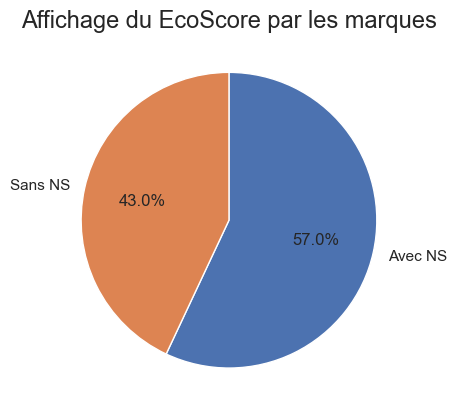

In [184]:
eco2_x = len(eco2[eco2["count"]>0])
eco2_y = len(eco2[eco2["count"]==0])

x = [eco2_x, eco2_y]
label =["Avec NS", "Sans NS"]

plt.title("Affichage du EcoScore par les marques", fontsize=17)

plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")


# Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

In [63]:
env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932866 entries, 0 to 932865
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   code            932866 non-null  object
 1   product_name    907007 non-null  object
 2   quantity        279260 non-null  object
 3   brands_tags     463922 non-null  object
 4   countries_tags  932866 non-null  object
 5   serving_size    89842 non-null   object
 6   image_url       842701 non-null  object
 7   ecoscore_grade  931887 non-null  object
 8   est_plastique   932866 non-null  bool  
 9   est_palm        932866 non-null  bool  
 10  est_cocoa       932866 non-null  bool  
dtypes: bool(3), object(8)
memory usage: 59.6+ MB


In [64]:
env.ecoscore_grade.unique()

array(['d', 'unknown', 'c', 'e', 'b', 'not-applicable', 'a', nan],
      dtype=object)

In [65]:
env_temp = env.copy()

#remplacer soit par inconnu soit par le nom du produit
env_temp["brands_tags"] = env_temp["brands_tags"].fillna(env_temp["product_name"])


env_temp.dropna(subset="ecoscore_grade", inplace=True)
env_a = env_temp[["brands_tags"]]

#get_dummies permets de transformer des données qualifiant sous forme bool
env_b = pd.get_dummies(env_temp.ecoscore_grade)

env_marge = env_a.join(env_b)
env_marge.dropna(inplace=True)
env_marge

,brands_tags,a,b,c,d,e,not-applicable,unknown
0,danone,0,0,0,1,0,0,0
1,Vitória crackers,0,0,0,0,0,0,1
2,Cacao,0,0,0,0,0,0,1
3,courte-paille,0,0,1,0,0,0,0
4,Sauce Sweety chili 0%,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
932861,Crème de Marrons,0,0,0,0,0,0,1
932862,Steak haché,0,0,0,0,1,0,0
932863,Steak haché,0,0,0,0,0,0,1
932864,pages,0,0,0,0,0,0,1


In [66]:
#transformer les bool aux ciffres
scores_env = {"a":5, "b":4, "c":3, "d":2, "e":1}
env_marge['score_total'] = env_marge[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores_env)), axis=1)

env_trie = env_marge.sort_values('score_total', ascending=False)
env_trie


,brands_tags,a,b,c,d,e,not-applicable,unknown,score_total
142808,les-pains-fleur-d-or,1,0,0,0,0,0,0,5
340358,florelli,1,0,0,0,0,0,0,5
263707,mellidor,1,0,0,0,0,0,0,5
340315,toscoro,1,0,0,0,0,0,0,5
56677,Betteraves rouges,1,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...
437604,Tutti frutti,0,0,0,0,0,0,1,0
437605,fazer,0,0,0,0,0,0,1,0
437606,Fazer Skolekridt,0,0,0,0,0,0,1,0
437607,fazer,0,0,0,0,0,0,1,0


In [72]:
top_ES = env_trie.groupby(by="brands_tags").sum().sort_values(by="score_total", ascending=False)
top_ES

,a,b,c,d,e,not-applicable,unknown,score_total
brands_tags,,,,,,,,
auchan,379,1830,1261,1771,1255,112,4544,17795
carrefour,411,1646,1282,1900,1328,179,5696,17613
u,401,1147,1156,905,606,145,2391,12477
casino,174,852,636,763,492,53,1939,8204
leader-price,162,788,569,829,479,51,1700,7806
...,...,...,...,...,...,...,...,...
Jus 7 Reveille-Moi,0,0,0,0,0,0,1,0
"Jus 4 fruit pomme, cassis, framboise, raisin",0,0,0,0,0,0,1,0
Jus 4 agrumes Vitamont,0,0,0,0,0,0,1,0


In [73]:
top_ES["Nb_produits"] = top_ES["a"]+top_ES["b"]+top_ES["c"]+top_ES["d"]+top_ES["e"]
top_ES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329714 entries, auchan to 햇반Hetbahn
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   a               329714 non-null  uint64
 1   b               329714 non-null  uint64
 2   c               329714 non-null  uint64
 3   d               329714 non-null  uint64
 4   e               329714 non-null  uint64
 5   not-applicable  329714 non-null  uint64
 6   unknown         329714 non-null  uint64
 7   score_total     329714 non-null  int64 
 8   Nb_produits     329714 non-null  uint64
dtypes: int64(1), uint64(8)
memory usage: 25.2+ MB


In [75]:
top_ES

In [77]:
top_ES_trie = top_ES.copy()
ind = top_ES_trie[top_ES_trie["Nb_produits"] <500].index
top_ES_trie.drop(ind, inplace = True)
top_ES_trie.info()


<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, auchan to haribo
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   a               29 non-null     uint64
 1   b               29 non-null     uint64
 2   c               29 non-null     uint64
 3   d               29 non-null     uint64
 4   e               29 non-null     uint64
 5   not-applicable  29 non-null     uint64
 6   unknown         29 non-null     uint64
 7   score_total     29 non-null     int64 
 8   Nb_produits     29 non-null     uint64
dtypes: int64(1), uint64(8)
memory usage: 2.3+ KB


In [87]:
top_ES_ratio = top_ES_trie.copy()

top_ES_ratio["ratio_AB(%)"] = ((top_ES_ratio["a"]+top_ES_ratio["b"])/top_ES_ratio["Nb_produits"]*100).round(2)
top_ES_ratio = top_ES_ratio.sort_values(by="ratio_AB(%)", ascending=False).head(5)
top_ES_ratio

,a,b,c,d,e,not-applicable,unknown,score_total,Nb_produits,ratio_AB(%)
brands_tags,,,,,,,,,,
"bio-village,marque-repere",91,274,140,74,23,39,225,2142,602,60.63
la-vie-claire,95,585,258,194,93,1,961,4070,1225,55.51
picard,74,518,260,314,137,2,1600,3987,1303,45.43
dia,37,173,132,124,72,14,242,1593,538,39.03
franprix,61,462,277,354,200,4,566,3892,1354,38.63


In [93]:
worst_ES_ratio = top_NS.copy()

worst_ES_ratio["ratio_DE(%)"] = ((worst_ES_ratio["d"]+worst_ES_ratio["e"])/worst_ES_ratio["Nb_produits"]*100).round(2)
worst_ES_ratio = worst_ES_ratio.sort_values(by="ratio_DE(%)", ascending=False).head(5)
worst_ES_ratio

,a,b,c,d,e,score_total,Nb_produits,ratio_DE(%)
brands_tags,,,,,,,,
haribo,2,6,9,483,25,1052,525,96.76
labeyrie,0,12,36,360,189,1065,597,91.96
leclerc,29,53,125,253,193,1431,653,68.30
bonne-maman,14,14,162,189,149,1139,528,64.02
nestle,68,96,296,230,350,2422,1040,55.77


<Axes: title={'center': 'Proportion des 5 meilleurs marques avec des Ecoscores A,B'}, xlabel='Marques', ylabel='Ratio AB(%)'>

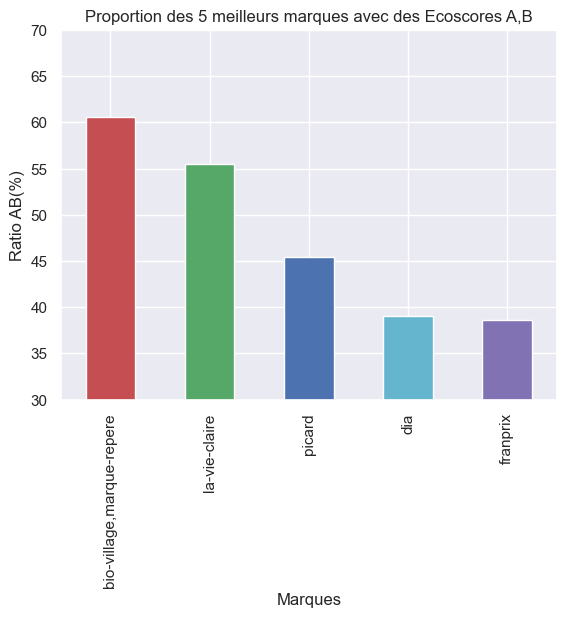

In [185]:
top_ES_ratio.iloc[:,-1].plot.bar(ylim=(30,70), ylabel="Ratio AB(%)", xlabel="Marques",\
                                 color=list_color,\
                                 title="Proportion des 5 meilleurs marques avec des Ecoscores A,B")

<Axes: title={'center': 'Proportion des 5 pires marques avec des Ecoscores D,E'}, xlabel='Marques', ylabel='Ratio DE(%)'>

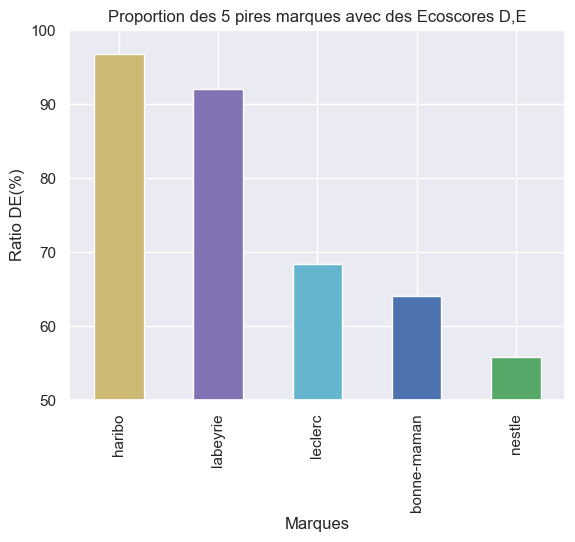

In [186]:
worst_ES_ratio.iloc[:,-1].plot.bar(ylim=(50,100), ylabel="Ratio DE(%)", xlabel="Marques",\
                                 color=list_color[::-1],\
                                 title="Proportion des 5 pires marques avec des Ecoscores D,E")

# Quelles sont les marques qui proposent essentiellement des produits biologiques ?

In [190]:
bio = bio_init()

In [191]:
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463922 entries, 0 to 463921
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_name  456563 non-null  object
 1   brands_tags   463922 non-null  object
 2   serving_size  86178 non-null   object
 3   est_bio       463922 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 11.1+ MB


In [197]:
bio_tem = bio.copy()
bio_tem = bio_tem[["brands_tags","est_bio"]]

bio_tem


bio_ratio = bio_tem.groupby(by="brands_tags").est_bio.agg([sum,"count"]).sort_values("sum", ascending=False)
bio_ratio["ratio%"] = bio_ratio["sum"]/bio_ratio["count"]*100

ind2 = bio_ratio[bio_ratio["count"] <500].index
bio_ratio.drop(ind2, inplace = True)

bio_ratio = bio_ratio.sort_values("ratio%", ascending=False)
bio_ratio_10 = bio_ratio.head(10)
bio_ratio_10

,sum,count,ratio%
brands_tags,,,
"carrefour-bio,carrefour",539,542,99.446494
"u-bio,u",610,618,98.705502
"bio-village,marque-repere",852,866,98.383372
biocoop,768,828,92.753623
bonneterre,552,616,89.610390
bio-village,947,1060,89.339623
primeal,648,728,89.010989
moulin-des-moines,792,892,88.789238
la-vie-claire,1938,2187,88.614540


<Axes: title={'center': 'Proportion des 5 meilleurs marques proposent des produits bio'}, xlabel='brands_tags', ylabel='Ratio(%)'>

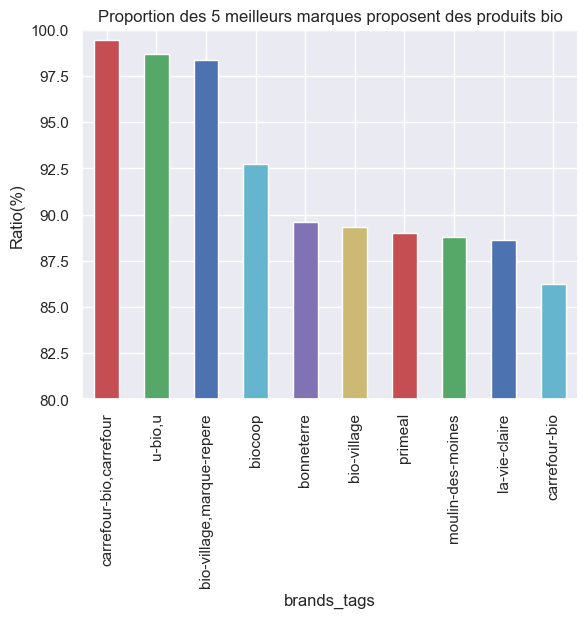

In [198]:
bio_ratio_10.iloc[:,-1].plot.bar(ylim=(80,100), ylabel="Ratio(%)", color=list_color, title="Proportion des 5 meilleurs marques proposent des produits bio")

# Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ?

In [98]:
correl_bio_quali = quali.merge(bio, how= "inner", on= ["brands_tags","product_name"], indicator = "merge")
correl_bio_quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size_x,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,serving_size_y,est_bio,merge
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,NaN,False,both
1,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,140g,False,both
2,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,NaN,False,both
3,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,NaN,False,both
4,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,1 pot (140g),False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970490,996299394093,Nutra'cake framboise,NaN,delical,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,381.0,12.7,6.70,29.0,15.6,0.80,0.0,NaN,False,both
970491,997046,Chocolat noir patissier,NaN,monoprix-bio,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,578.0,39.0,24.00,46.0,5.1,0.00,0.0,NaN,True,both
970492,998042,Saveur ABRICIT,NaN,gerble,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,45.0,1.8,0.01,1.5,9.7,0.13,0.0,NaN,False,both
970493,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,False,both


In [99]:
# Création de ma table de contingence
X = "nutriscore_grade"
Y = "est_bio"

cont_1 = correl_bio_quali[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

est_bio,False,True,Total
nutriscore_grade,,,
a,132767,16158,148925
b,81011,8539,89550
c,96270,11545,107815
d,129636,14307,143943
e,65480,7027,72507
Total,505164,57576,562740


In [100]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(correl_bio_quali[[X,Y]].dropna())
indep = (tx.dot(ty) / n)
indep

est_bio,False,True,Total
nutriscore_grade,,,
a,133687.935281,15237.064719,148925.0
b,80387.810001,9162.189999,89550.0
c,96784.050645,11030.949355,107815.0
d,129215.662032,14727.337968,143943.0
e,65088.542041,7418.457959,72507.0
Total,505164.000000,57576.000000,562740.0


In [134]:
chi2, p, dof, expected_freq= chi2_contingency(cont_1)
print("chi2 =",chi2, "\n", "p =", p)

chi2 = 172.2854459132039 
 p = 9.327222715878854e-32


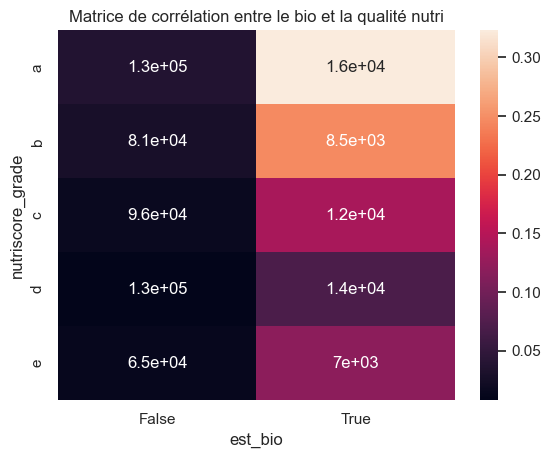

In [109]:
c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le bio et la qualité nutri')
plt.show()

# Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

In [118]:
env_b = env[env.brands_tags.notna()].copy()
env_b = env_b[env.product_name.notna()]
env_b['ecoscore_grade'].replace('unknown', np.NaN, inplace = True)
env_b['ecoscore_grade'].replace('not-applicable', np.NaN, inplace = True)

correl_bio_env = env_b.merge(bio, how= "inner", on= ["brands_tags","product_name"], indicator = "merge")
correl_bio_env

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21900\3367182173.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  env_b = env_b[env.product_name.notna()]


,code,product_name,quantity,brands_tags,countries_tags,serving_size_x,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa,serving_size_y,est_bio,merge
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False,NaN,False,both
1,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False,140g,False,both
2,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False,NaN,False,both
3,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False,NaN,False,both
4,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False,1 pot (140g),False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970490,996299394093,Nutra'cake framboise,NaN,delical,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,NaN,False,both
970491,997046,Chocolat noir patissier,NaN,monoprix-bio,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,NaN,True,both
970492,998042,Saveur ABRICIT,NaN,gerble,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,NaN,False,both
970493,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,NaN,False,both


In [119]:
# Création de ma table de contingence
X = "ecoscore_grade"
Y = "est_bio"

cont_2 = correl_bio_env[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

est_bio,False,True,Total
ecoscore_grade,,,
a,13545,6249,19794
b,65416,20511,85927
c,67860,11630,79490
d,238178,13387,251565
e,88525,4068,92593
Total,473524,55845,529369


In [120]:
tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(correl_bio_env[[X,Y]].dropna())
indep2 = (tx.dot(ty) / n)
indep2

est_bio,False,True,Total
ecoscore_grade,,,
a,17705.861235,2088.138765,19794.0
b,76862.258175,9064.741825,85927.0
c,71104.319973,8385.680027,79490.0
d,225026.522256,26538.477744,251565.0
e,82825.038361,9767.961639,92593.0
Total,473524.000000,55845.000000,529369.0


In [133]:
chi2, p, dof, expected_freq= chi2_contingency(cont_2)
print("chi2 =",chi2, "\n", "p =", p)

chi2 = 37834.452049527885 
 p = 0.0


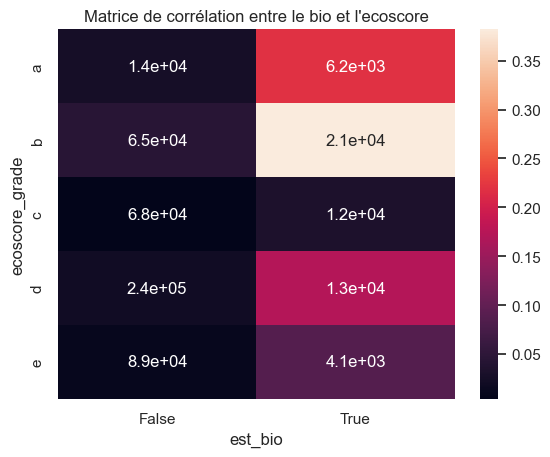

In [137]:

c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep2)**2/indep2
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le bio et l\'ecoscore')
plt.show()

# Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

In [127]:
correl_quali_env = env_b.merge(quali, how= "inner", on= ["code"], indicator = "merge")

In [128]:

X = "ecoscore_grade"
Y = "nutriscore_grade"

cont_3 = correl_quali_env[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_3

nutriscore_grade,a,b,c,d,e,Total
ecoscore_grade,,,,,,
a,4214,2382,2435,1579,241,10851
b,13376,7606,12038,13176,3120,49316
c,4460,4502,10213,13299,6672,39146
d,3536,5791,11956,17638,11265,50186
e,2623,4052,4212,11467,11392,33746
Total,28209,24333,40854,57159,32690,183245


In [129]:
tx = cont_3.loc[:,["Total"]]
ty = cont_3.loc[["Total"],:]
n = len(correl_quali_env[[X,Y]].dropna())
indep3 = (tx.dot(ty) / n)
indep3

nutriscore_grade,a,b,c,d,e,Total
ecoscore_grade,,,,,,
a,1670.418614,1440.898158,2419.202456,3384.716140,1935.764632,10851.0
b,7591.776278,6548.643772,10994.874971,15382.974946,8797.730034,49316.0
c,6026.191787,5198.175219,8727.499708,12210.680859,6983.452427,39146.0
d,7725.705334,6664.170580,11188.839226,15654.351136,8952.933723,50186.0
e,5194.907987,4481.112270,7523.583639,10526.276919,6020.119185,33746.0
Total,28209.000000,24333.000000,40854.000000,57159.000000,32690.000000,183245.0


In [132]:
chi2, p, dof, expected_freq= chi2_contingency(cont_3)
print("chi2 =",chi2, "\n", "p =", p)

chi2 = 27393.712838390493 
 p = 0.0


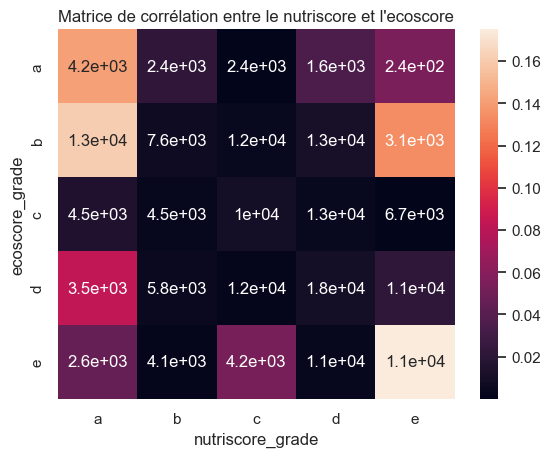

In [139]:
c = cont_3.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep3)**2/indep3
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le nutriscore et l\'ecoscore')
plt.show()

# Quelles marques faut-il recommander ?

In [208]:
bio_ratio

,sum,count,ratio%
brands_tags,,,
"carrefour-bio,carrefour",539,542,99.446494
"u-bio,u",610,618,98.705502
"bio-village,marque-repere",852,866,98.383372
biocoop,768,828,92.753623
bonneterre,552,616,89.610390
...,...,...,...
milka,1,733,0.136426
lindt,1,1018,0.098232
coca-cola,0,513,0.000000


In [210]:
# Déterminons nos paramètres pour définir quelles marques recommandées
# exlusion les marques utilisant des additifs nocifs
# 50% de la note tient compte du Scoring nurtri
# 30% de la note tient compte du Scoring éco
# 20% de la note tient compte du Bio 
# exclure des recommandations les marques utlisant des additifs nocifs
#ind4 = nocif[nocif["nb_nocif_1"] >=1].index
#nocif.drop(ind4, inplace = True)
#nocif
nocif

,sum,count,ratio
brands_tags,,,
sodastream,29.0,145,20.00
"nestle,sveltesse",10.0,19,52.63
a-rom,9.0,59,15.25
dove,8.0,47,17.02
nestle,7.0,2863,0.24
...,...,...,...
Haricots blancs extra,0.0,1,0.00
Haricots blancs en sauce tomate,0.0,1,0.00
Haricots blancs cuits avec des légumes,0.0,1,0.00


In [243]:
quali = quali_init()

In [245]:
quali = quali[quali.brands_tags.notna()]
quali = quali[quali.product_name.notna()]
quali['nutriscore_grade'].replace('unknown', np.NaN, inplace = True)
quali['nutriscore_grade'].replace('not-applicable', np.NaN, inplace = True)

In [246]:
#on crée deux colonnes : une pour les produit avec additif "nb_nocif_1" et l'autre sans additif "nb_nocif_0"
quali["nb_nocif_1"] = quali["nb_nocif"].loc[quali["nb_nocif"] == 1]
quali["nb_nocif_0"] = quali["nb_nocif"].loc[quali["nb_nocif"] == 0]

nocif_a = quali[["brands_tags","product_name","nb_nocif_1","nb_nocif_0"]]
nocif_a = nocif_a.groupby("brands_tags").count()

# on supprime toutes les marques avec un échantillon de moins de 500 produits
ind2 = nocif_a[nocif_a["product_name"] <500].index
nocif_a.drop(ind2, inplace = True)

nocif_a["ratio_nocif"] = nocif_a["nb_nocif_1"]/nocif_a["product_name"]*100


nocif_a

,product_name,nb_nocif_1,nb_nocif_0,ratio_nocif
brands_tags,,,,
andros,835,0,835,0.000000
auchan,11062,1,11061,0.009040
barilla,634,0,634,0.000000
belle-france,1669,1,1668,0.059916
bio-village,1039,0,1039,0.000000
...,...,...,...,...
tropicana,548,0,548,0.000000
u,6671,0,6671,0.000000
"u-bio,u",618,0,618,0.000000


In [255]:
quali["nutriscore_grade"] =quali["nutriscore_grade"].fillna("NC")
nutriscore2 = quali.pivot_table(index="brands_tags", columns =["nutriscore_grade"], values = "product_name", aggfunc ={"product_name" : "count"}, margins=True)

# Supprimer la ligne "All"
nutriscore2.drop("All", axis=0, inplace=True)

# on supprime toutes les marques avec un échantillon de moins de 500 produits avec un nurtiscore
# filtrer à 500 sur le product_name 
ind2 = nutriscore2[nutriscore2["All"] <500].index
nutriscore2.drop(ind2, inplace = True)

# on remplace les NaN par la valeur 0
nutriscore2 = nutriscore2.fillna(0)


In [256]:
#scoring
scores_nutri = {"a":5, "b":4, "c":3, "d":2, "e":1}
nutriscore2['score_total_marque'] = nutriscore2[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores_nutri)), axis=1)
nutriscore2

nutriscore_grade,NC,a,b,c,d,e,All,score_total_marque
brands_tags,,,,,,,,
andros,311.0,249.0,40.0,150.0,48.0,37.0,835,1988.0
auchan,4038.0,1669.0,1081.0,1484.0,1826.0,964.0,11062,21737.0
barilla,318.0,223.0,26.0,36.0,18.0,13.0,634,1376.0
belle-france,267.0,257.0,185.0,335.0,373.0,252.0,1669,4028.0
bio-village,765.0,94.0,30.0,42.0,92.0,16.0,1039,916.0
...,...,...,...,...,...,...,...,...
tropicana,200.0,7.0,13.0,239.0,35.0,54.0,548,928.0
u,2150.0,977.0,728.0,935.0,1226.0,655.0,6671,13709.0
"u-bio,u",140.0,149.0,73.0,85.0,106.0,65.0,618,1569.0


In [249]:
nutriscore2.All.isna().sum()

0

In [257]:
nutriscore2 ['ratio_a'] = nutriscore2["a"] / nutriscore2["All"] * 100
nutriscore2 ['ratio_e'] = nutriscore2["e"] / nutriscore2["All"] * 100
#nutriscore2 ['ratio_score_total_marque'] = nutriscore2["score_total_marque"] / nutriscore2["score_total_marque"].sum() * 100
nutriscore2 ['ratio_score_nutri_marque'] = nutriscore2["score_total_marque"] / nutriscore2["All"].sum() * 100

In [254]:
nutriscore2.ratio_score_nutri_marque.isna().sum()

0

In [258]:
# Marque avec le plus grand de produits noté A sur l'ensemble de ses produits affichant le nutriscore 
nutriscore2.sort_values("ratio_a", ascending = False).head(5)

nutriscore_grade,NC,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_nutri_marque
brands_tags,,,,,,,,,,,
la-nouvelle-agriculture,228.0,560.0,260.0,27.0,32.0,5.0,1112,3990.0,50.359712,0.449640,3.333918
bonduelle,459.0,486.0,104.0,35.0,2.0,0.0,1086,2955.0,44.751381,0.000000,2.469105
primeal,327.0,272.0,51.0,42.0,23.0,8.0,723,1744.0,37.621024,1.106501,1.457231
barilla,318.0,223.0,26.0,36.0,18.0,13.0,634,1376.0,35.173502,2.050473,1.149742
panzani,323.0,258.0,85.0,82.0,35.0,0.0,783,1946.0,32.950192,0.000000,1.626016


In [259]:
df1 = pd.merge(bio_ratio,nocif_a, on = 'brands_tags', how= 'outer', indicator = "True")
df1 = df1[["ratio%", "ratio_nocif"]]
df1


,ratio%,ratio_nocif
brands_tags,,
"carrefour-bio,carrefour",99.446494,0.000000
"u-bio,u",98.705502,0.000000
"bio-village,marque-repere",98.383372,0.000000
biocoop,92.753623,0.000000
bonneterre,89.610390,0.000000
...,...,...
milka,0.136426,0.000000
lindt,0.098232,0.000000
coca-cola,0.000000,NaN


In [219]:
env = env_init()

In [224]:
env = env[env.brands_tags.notna()]
env = env[env.product_name.notna()]
env['ecoscore_grade'].replace('unknown', np.NaN, inplace = True)
env['ecoscore_grade'].replace('not-applicable', np.NaN, inplace = True)
env["ecoscore_grade"] =env["ecoscore_grade"].fillna("NC")

In [225]:
ecoscore2 = env.pivot_table(index="brands_tags", columns ="ecoscore_grade", values = "product_name", aggfunc ={"product_name" : "count"}, margins=True)

# Supprimer la ligne "All"
ecoscore2.drop("All", axis=0, inplace=True)

# on supprime toutes les marques avec un échantillon de moins de 500 produits avec un nurtiscore
# filtrer à 500 sur le product_name 
ind3 = ecoscore2[ecoscore2["All"] <500].index
ecoscore2.drop(ind3, inplace = True)

# on remplace les NaN par la valeur 0
ecoscore2 = ecoscore2.fillna(0)
ecoscore2

ecoscore_grade,NC,a,b,c,d,e,All
brands_tags,,,,,,,
andros,368.0,54.0,248.0,67.0,95.0,3.0,835
auchan,4578.0,379.0,1825.0,1258.0,1768.0,1254.0,11062
barilla,407.0,30.0,85.0,82.0,22.0,8.0,634
belle-france,326.0,64.0,437.0,278.0,337.0,227.0,1669
bio-village,648.0,12.0,176.0,65.0,105.0,33.0,1039
...,...,...,...,...,...,...,...
tropicana,245.0,2.0,16.0,79.0,206.0,0.0,548
u,2457.0,401.0,1147.0,1156.0,905.0,605.0,6671
"u-bio,u",154.0,123.0,158.0,116.0,56.0,11.0,618


In [226]:
#scoring
scores_eco = {"a":5, "b":4, "c":3, "d":2, "e":1}
ecoscore2['score_total_marque'] = ecoscore2[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores_eco)), axis=1)
ecoscore2

ecoscore_grade,NC,a,b,c,d,e,All,score_total_marque
brands_tags,,,,,,,,
andros,368.0,54.0,248.0,67.0,95.0,3.0,835,1656.0
auchan,4578.0,379.0,1825.0,1258.0,1768.0,1254.0,11062,17759.0
barilla,407.0,30.0,85.0,82.0,22.0,8.0,634,788.0
belle-france,326.0,64.0,437.0,278.0,337.0,227.0,1669,3803.0
bio-village,648.0,12.0,176.0,65.0,105.0,33.0,1039,1202.0
...,...,...,...,...,...,...,...,...
tropicana,245.0,2.0,16.0,79.0,206.0,0.0,548,723.0
u,2457.0,401.0,1147.0,1156.0,905.0,605.0,6671,12476.0
"u-bio,u",154.0,123.0,158.0,116.0,56.0,11.0,618,1718.0


In [227]:
ecoscore2 ['ratio_a'] = ecoscore2["a"] / ecoscore2["All"] * 100
ecoscore2 ['ratio_e'] = ecoscore2["e"] / ecoscore2["All"] * 100
#ecoscore2 ['ratio_score_total_marque'] = ecoscore2["score_total_marque"] / ecoscore2["score_total_marque"].sum() * 100
ecoscore2 ['ratio_score_eco_marque'] = ecoscore2["score_total_marque"] / ecoscore2["All"].sum() * 100

In [223]:
ecoscore2.sort_values("ratio_a", ascending = False).head(5)

ecoscore_grade,a,b,c,d,e,not-applicable,unknown,All,score_total_marque,ratio_a,ratio_e,ratio_score_eco_marque
brands_tags,,,,,,,,,,,,
"u-bio,u",123.0,158.0,116.0,56.0,11.0,14.0,140.0,618.0,1718.0,19.902913,1.779935,1.435639
lipton,135.0,97.0,71.0,2.0,0.0,7.0,540.0,852.0,1280.0,15.845070,0.000000,1.069626
"carrefour-bio,carrefour",83.0,172.0,93.0,55.0,28.0,14.0,95.0,540.0,1520.0,15.370370,5.185185,1.270181
sainte-lucie,57.0,124.0,10.0,15.0,15.0,0.0,314.0,535.0,856.0,10.654206,2.803738,0.715312
"bio-village,marque-repere",91.0,271.0,140.0,71.0,23.0,38.0,224.0,858.0,2124.0,10.606061,2.680653,1.774911


In [260]:
df2 = pd.merge(nutriscore2,ecoscore2, on = 'brands_tags', how= 'outer', indicator = "True")
df2 = df2[["ratio_score_nutri_marque", "ratio_score_eco_marque"]]
df2

,ratio_score_nutri_marque,ratio_score_eco_marque
brands_tags,,
andros,1.661110,1.383701
auchan,18.162752,14.838861
barilla,1.149742,0.658428
belle-france,3.365670,3.177667
bio-village,0.765381,1.004353
...,...,...
tropicana,0.775408,0.604116
u,11.454808,10.424552
"u-bio,u",1.311007,1.435507


In [261]:
marques_reco = pd.merge(df1,df2, on = 'brands_tags', how= 'outer', indicator = "True")
marques_reco

,ratio%,ratio_nocif,ratio_score_nutri_marque,ratio_score_eco_marque,True
brands_tags,,,,,
"carrefour-bio,carrefour",99.446494,0.000000,1.249175,1.270064,both
"u-bio,u",98.705502,0.000000,1.311007,1.435507,both
"bio-village,marque-repere",98.383372,0.000000,1.687013,1.774747,both
biocoop,92.753623,0.000000,1.036105,1.147236,both
bonneterre,89.610390,0.000000,0.843089,0.995162,both
...,...,...,...,...,...
milka,0.136426,0.000000,0.262369,0.299969,both
lindt,0.098232,0.000000,0.426140,0.269053,both
coca-cola,0.000000,NaN,NaN,NaN,left_only


In [262]:
ind = marques_reco[marques_reco["ratio_nocif"] >0.000000000001].index
marques_reco.drop(ind, inplace = True)
marques_reco.dropna(subset="ratio_nocif", inplace=True)
marques_reco

,ratio%,ratio_nocif,ratio_score_nutri_marque,ratio_score_eco_marque,True
brands_tags,,,,,
"carrefour-bio,carrefour",99.446494,0.0,1.249175,1.270064,both
"u-bio,u",98.705502,0.0,1.311007,1.435507,both
"bio-village,marque-repere",98.383372,0.0,1.687013,1.774747,both
biocoop,92.753623,0.0,1.036105,1.147236,both
bonneterre,89.610390,0.0,0.843089,0.995162,both
...,...,...,...,...,...
"u-saveurs,u",0.394477,0.0,0.893223,0.844760,both
bonne-maman,0.243309,0.0,0.951712,1.284269,both
milka,0.136426,0.0,0.262369,0.299969,both


In [263]:
marques_reco.ratio_score_nutri_marque.sum()

110.82646078259344

In [265]:
marques_reco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, carrefour-bio,carrefour to haribo
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ratio%                    69 non-null     float64 
 1   ratio_nocif               69 non-null     float64 
 2   ratio_score_nutri_marque  69 non-null     float64 
 3   ratio_score_eco_marque    69 non-null     float64 
 4   True                      69 non-null     category
dtypes: category(1), float64(4)
memory usage: 4.9+ KB


In [269]:
scores_marque_reco = {"ratio%":0.2, "ratio_score_nutri_marque":0.5, "ratio_score_eco_marque":0.3}
marques_reco['score_final_marque_reco'] = marques_reco[["ratio%", "ratio_score_nutri_marque", "ratio_score_eco_marque"]].apply(lambda row: sum(row * pd.Series(scores_marque_reco)), axis=1)
marques_reco.sort_values("score_final_marque_reco", ascending = False).head(20)

,ratio%,ratio_nocif,ratio_score_nutri_marque,ratio_score_eco_marque,True,score_final_marque_reco
brands_tags,,,,,,
"bio-village,marque-repere",98.383372,0.0,1.687013,1.774747,both,21.052605
"carrefour-bio,carrefour",99.446494,0.0,1.249175,1.270064,both,20.894906
"u-bio,u",98.705502,0.0,1.311007,1.435507,both,20.827256
la-vie-claire,88.614540,0.0,3.315536,3.389901,both,20.397646
biocoop,92.753623,0.0,1.036105,1.147236,both,19.412948
primeal,89.010989,0.0,1.457231,1.041954,both,18.843400
moulin-des-moines,88.789238,0.0,1.142222,1.059501,both,18.646809
bonneterre,89.610390,0.0,0.843089,0.995162,both,18.642171
bio-village,89.339623,0.0,0.765381,1.004353,both,18.551921


# Quelles marques ne faut-il surtout pas recommander ?

In [270]:
marques_reco.sort_values("score_final_marque_reco", ascending = True).head(20)

,ratio%,ratio_nocif,ratio_score_nutri_marque,ratio_score_eco_marque,True,score_final_marque_reco
brands_tags,,,,,,
milka,0.136426,0.0,0.262369,0.299969,both,0.248460
lindt,0.098232,0.0,0.426140,0.269053,both,0.313432
saint-alby,0.744879,0.0,0.436167,0.236466,both,0.437999
haribo,0.000000,0.0,0.879018,0.516381,both,0.594423
reflets-de-france,0.562852,0.0,0.616650,0.731122,both,0.640232
maggi,2.388060,0.0,0.275738,0.116144,both,0.650324
myprotein,1.758794,0.0,0.564844,0.134527,both,0.674539
lu,1.310861,0.0,0.477945,0.687673,both,0.707447
toupargel,0.445765,0.0,0.975944,0.591582,both,0.754600


In [272]:
# exclure des recommandations les marques utlisant des additifs nocifs
marques_nocives = nocif_a.copy()
ind4 = marques_nocives[marques_nocives["nb_nocif_1"] <1].index
marques_nocives.drop(ind4, inplace = True)
marques_nocives

,product_name,nb_nocif_1,nb_nocif_0,ratio_nocif
brands_tags,,,,
auchan,11062,1,11061,0.009040
belle-france,1669,1,1668,0.059916
carrefour,11664,2,11662,0.017147
coop,1029,1,1028,0.097182
cora,3472,3,3469,0.086406
dia,789,1,788,0.126743
eco,633,4,629,0.631912
le-comptoir-de-mathilde,758,3,755,0.395778
leader-price,4538,5,4533,0.110181
